In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from matplotlib.ticker import FormatStrFormatter

In [2]:
def cole_turb(e_d):
    return (-2*np.log10(e_d/3.7))**-2

def coleb(Re,e_d):
    eqf = lambda f : f**-0.5+2*np.log10(e_d/3.7+2.51/Re/f**0.5)
    ffact = scipy.optimize.newton(eqf,cole_turb(e_d))
    return ffact

In [3]:
e=4.6*10**-5 #m
Q=0.03 # m3/s
rho=10**3 #m/s
mu=10**-3 # Pa*s
L = 20 #m 
D=np.linspace(6.8,574.7,1000)*10**-3
e_D=e/D
v=np.divide(Q/np.pi*4,np.square(D)) # m/s
Re=rho*v*D/mu
f = coleb(Re,e_D)
hl=np.multiply(np.multiply(f,np.square(v)/2/9.81),np.divide(L,D))

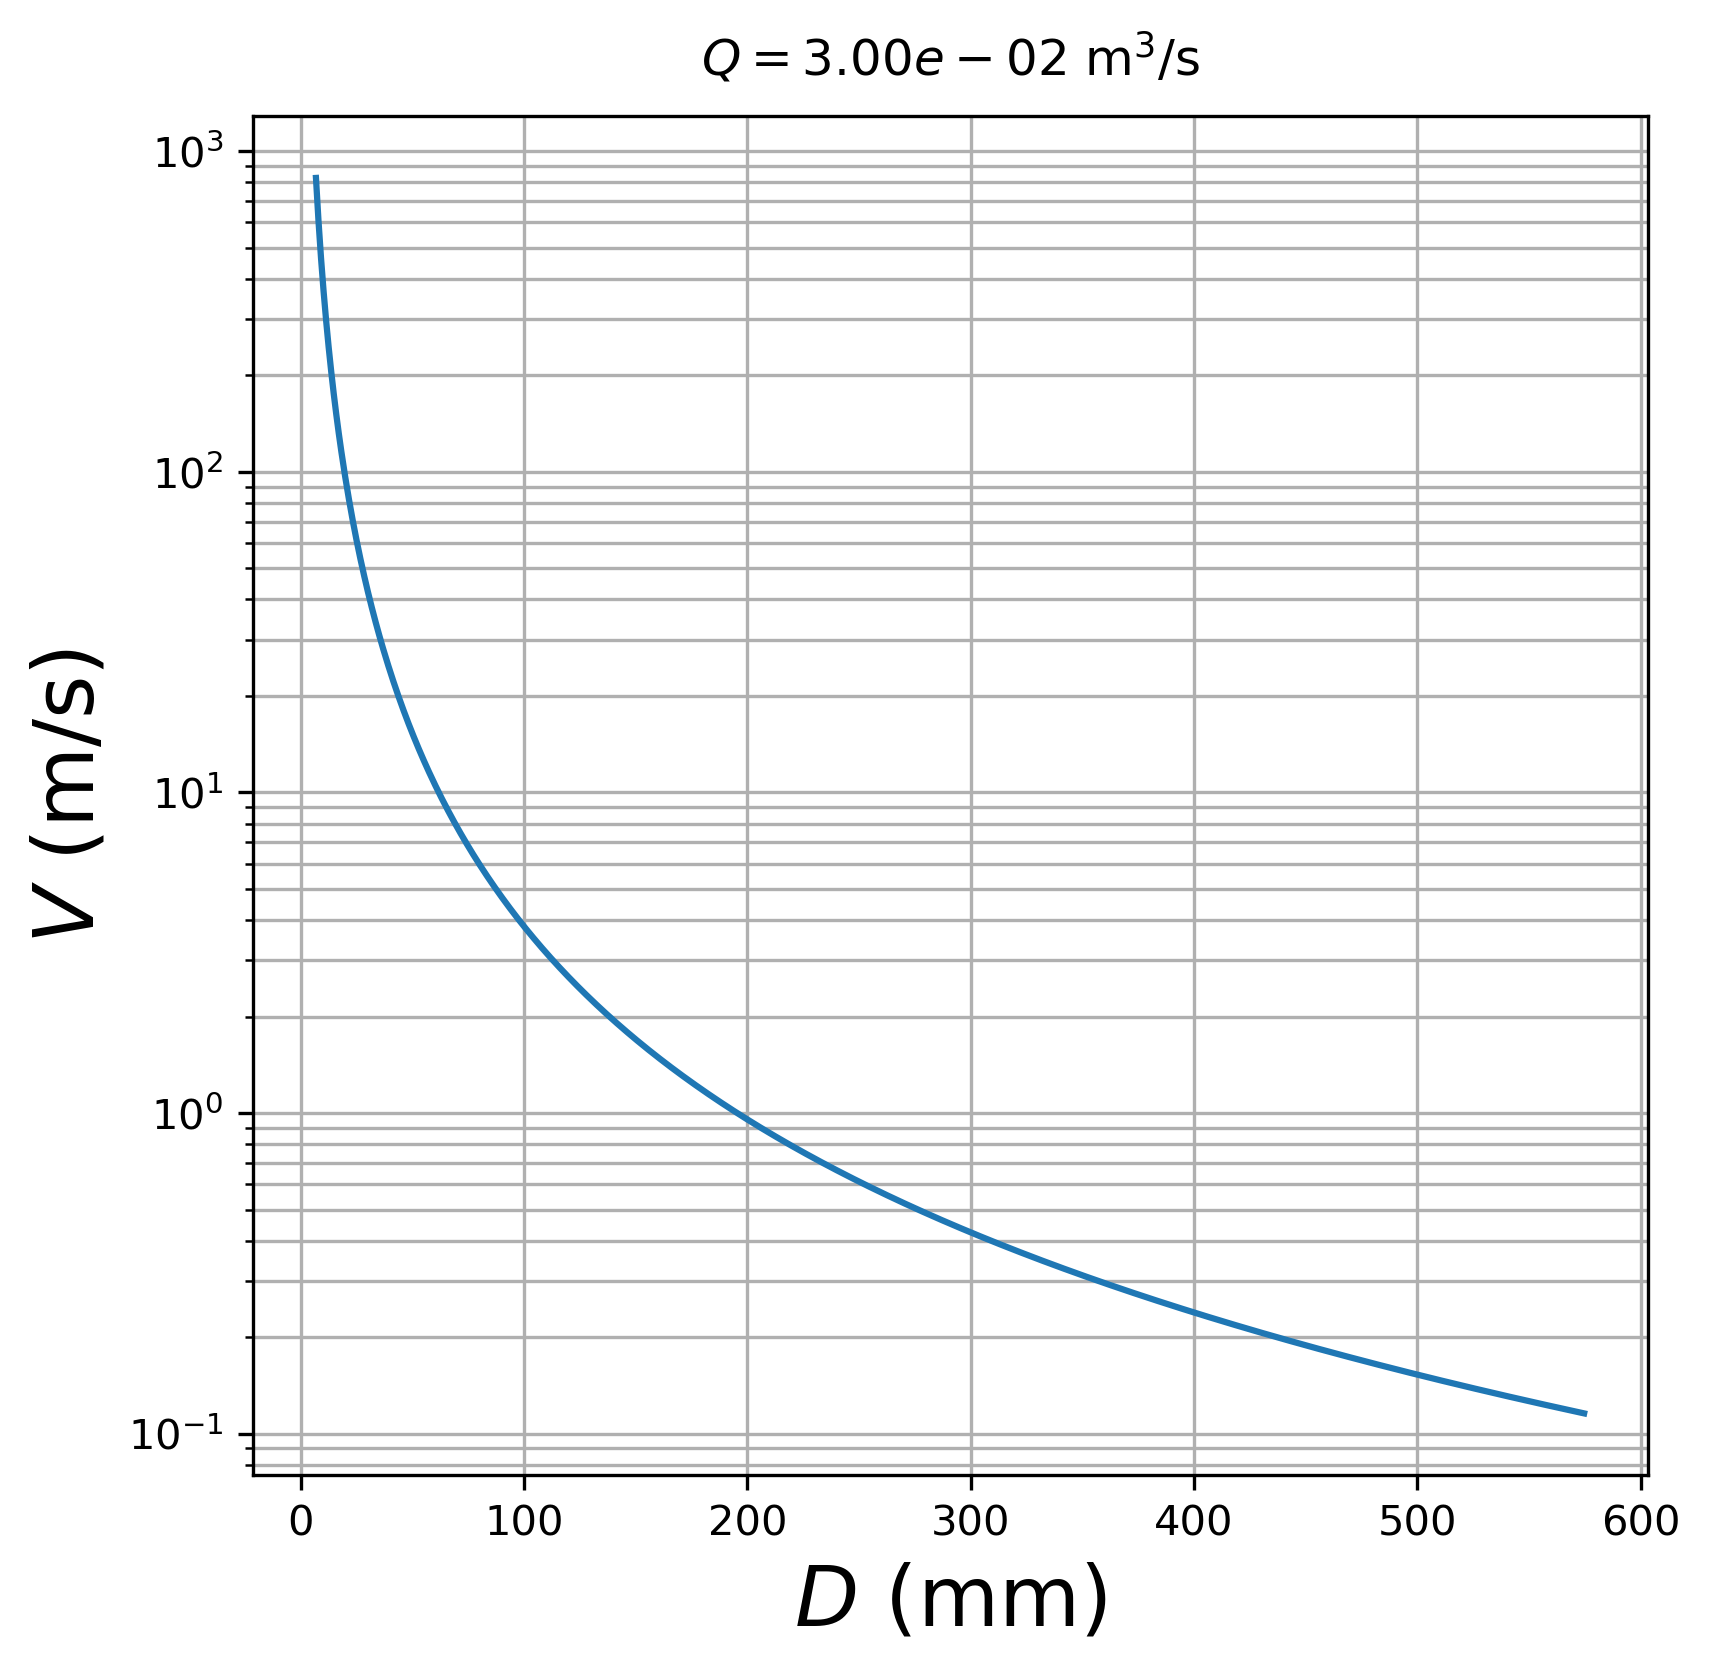

In [4]:
fig = plt.figure(figsize=(6,6),dpi=300)
ax=fig.add_subplot(111)
ttl = plt.title('$Q=%.2e$ m$^3$/s'%Q,pad=10)
ax.plot(D*10**3,v)
ax.set_xlabel('$D$ (mm)',fontsize=20)
ax.set_ylabel('$V$ (m/s)',fontsize=20)
plt.yscale('log')
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.1e'))
# ax.set_xlim(0,580)
ax.set_xticks(np.arange(0,700,100))
plt.grid('on',which='both')
plt.savefig('v.png')

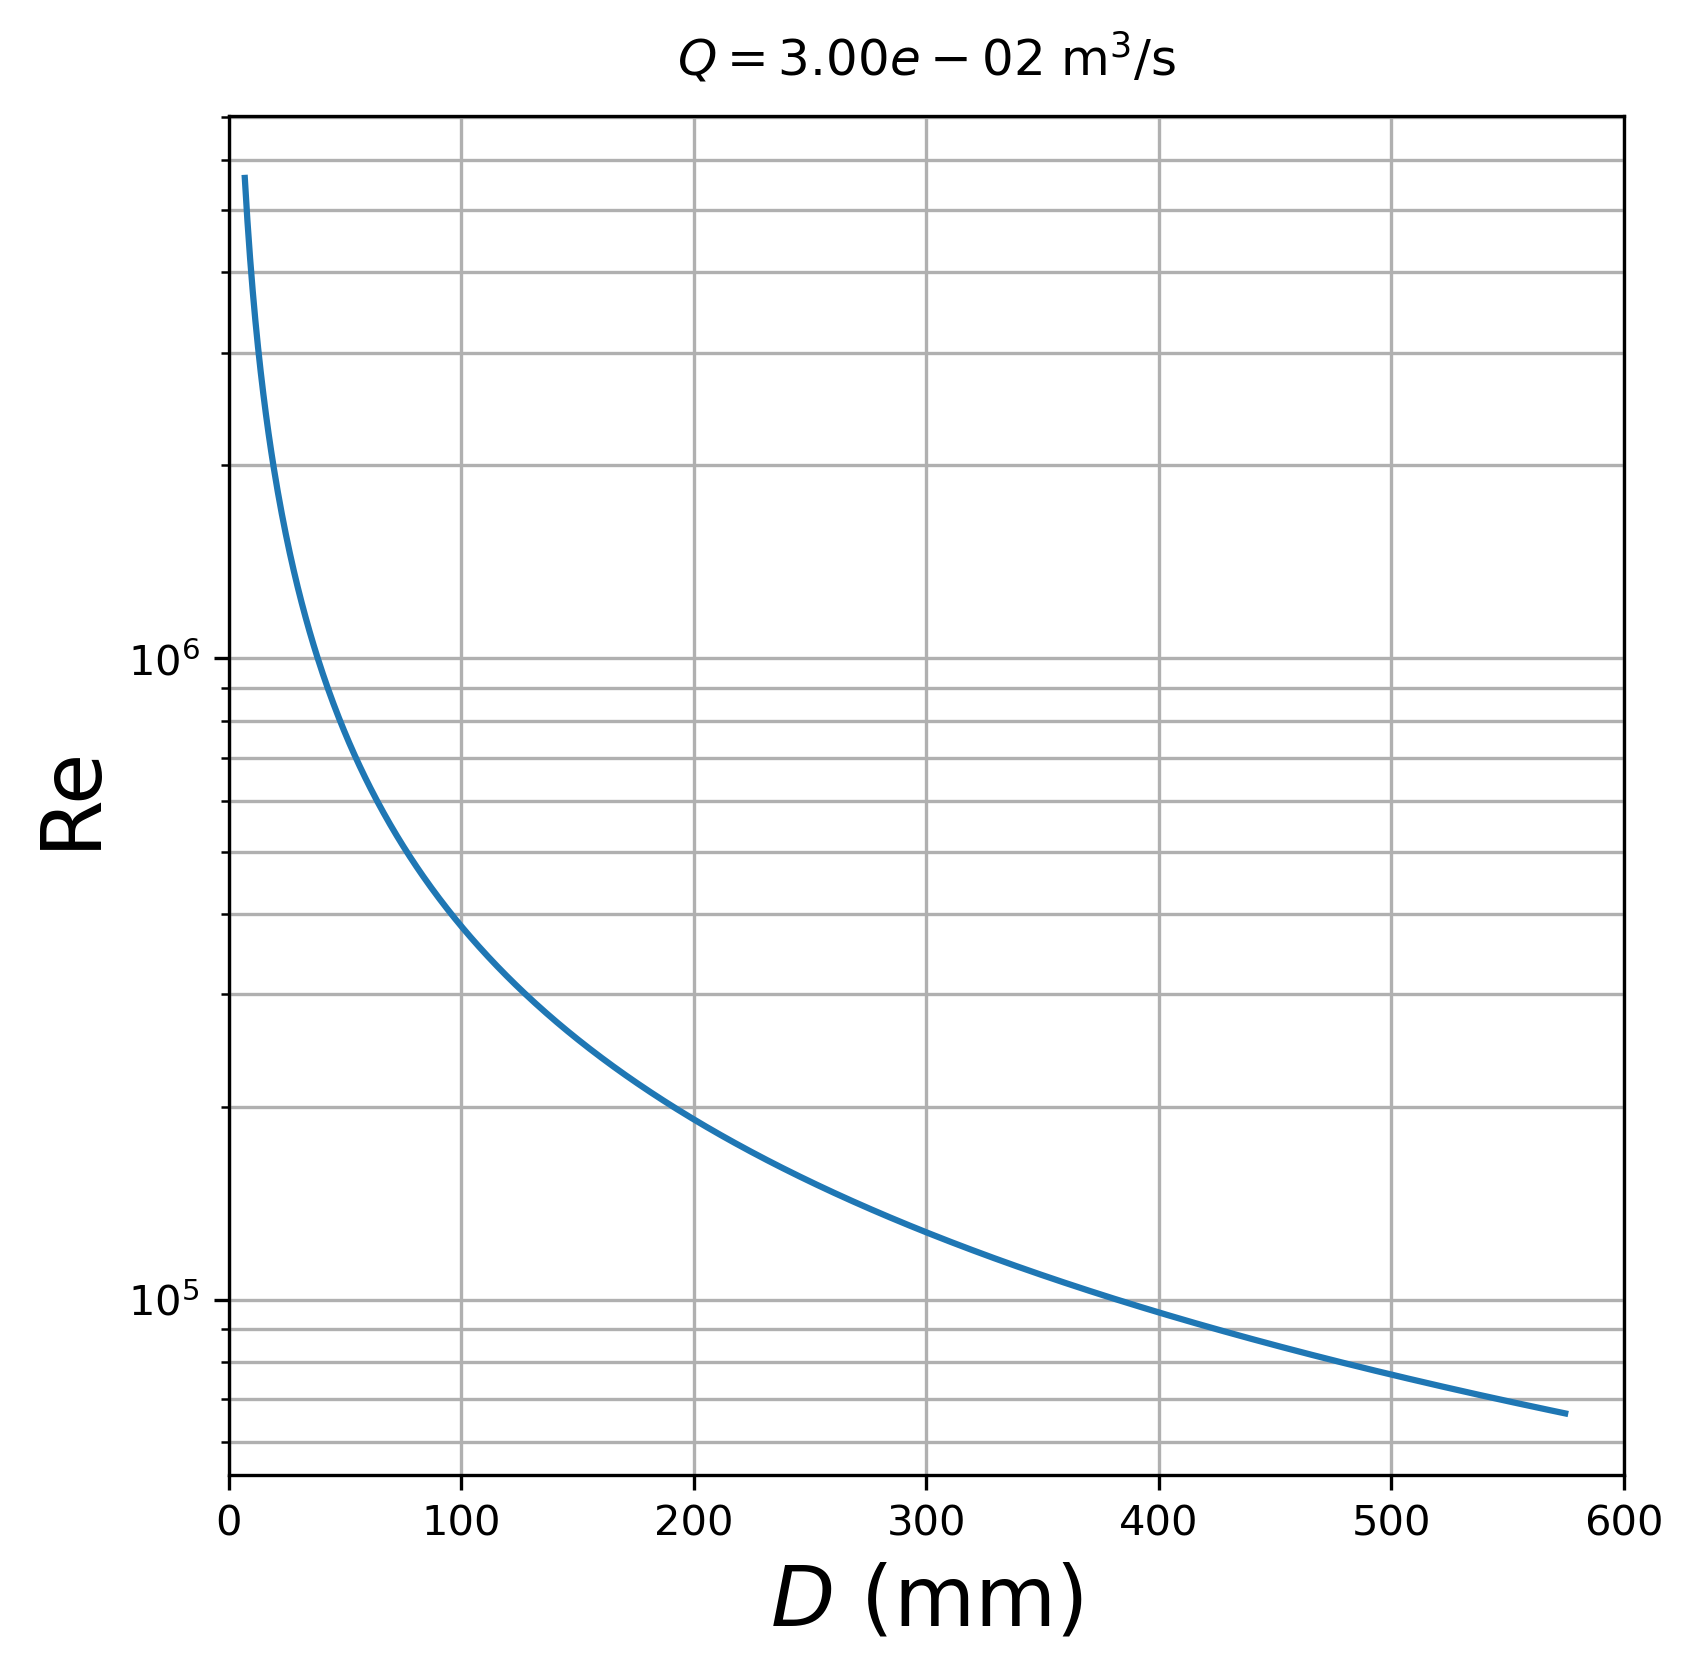

In [5]:
fig = plt.figure(figsize=(6,6),dpi=300)
ax=fig.add_subplot(111)
ttl = plt.title('$Q=%.2e$ m$^3$/s'%Q,pad=10)
ax.plot(D*10**3,Re)
ax.set_xlabel('$D$ (mm)',fontsize=20)
ax.set_ylabel('Re',fontsize=20)
ax.set_yscale("log")

# ax.xaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax.set_xlim(0,580)
ax.set_xticks(np.arange(0,700,100))
plt.grid('on',which='both')
plt.savefig('Re.png')

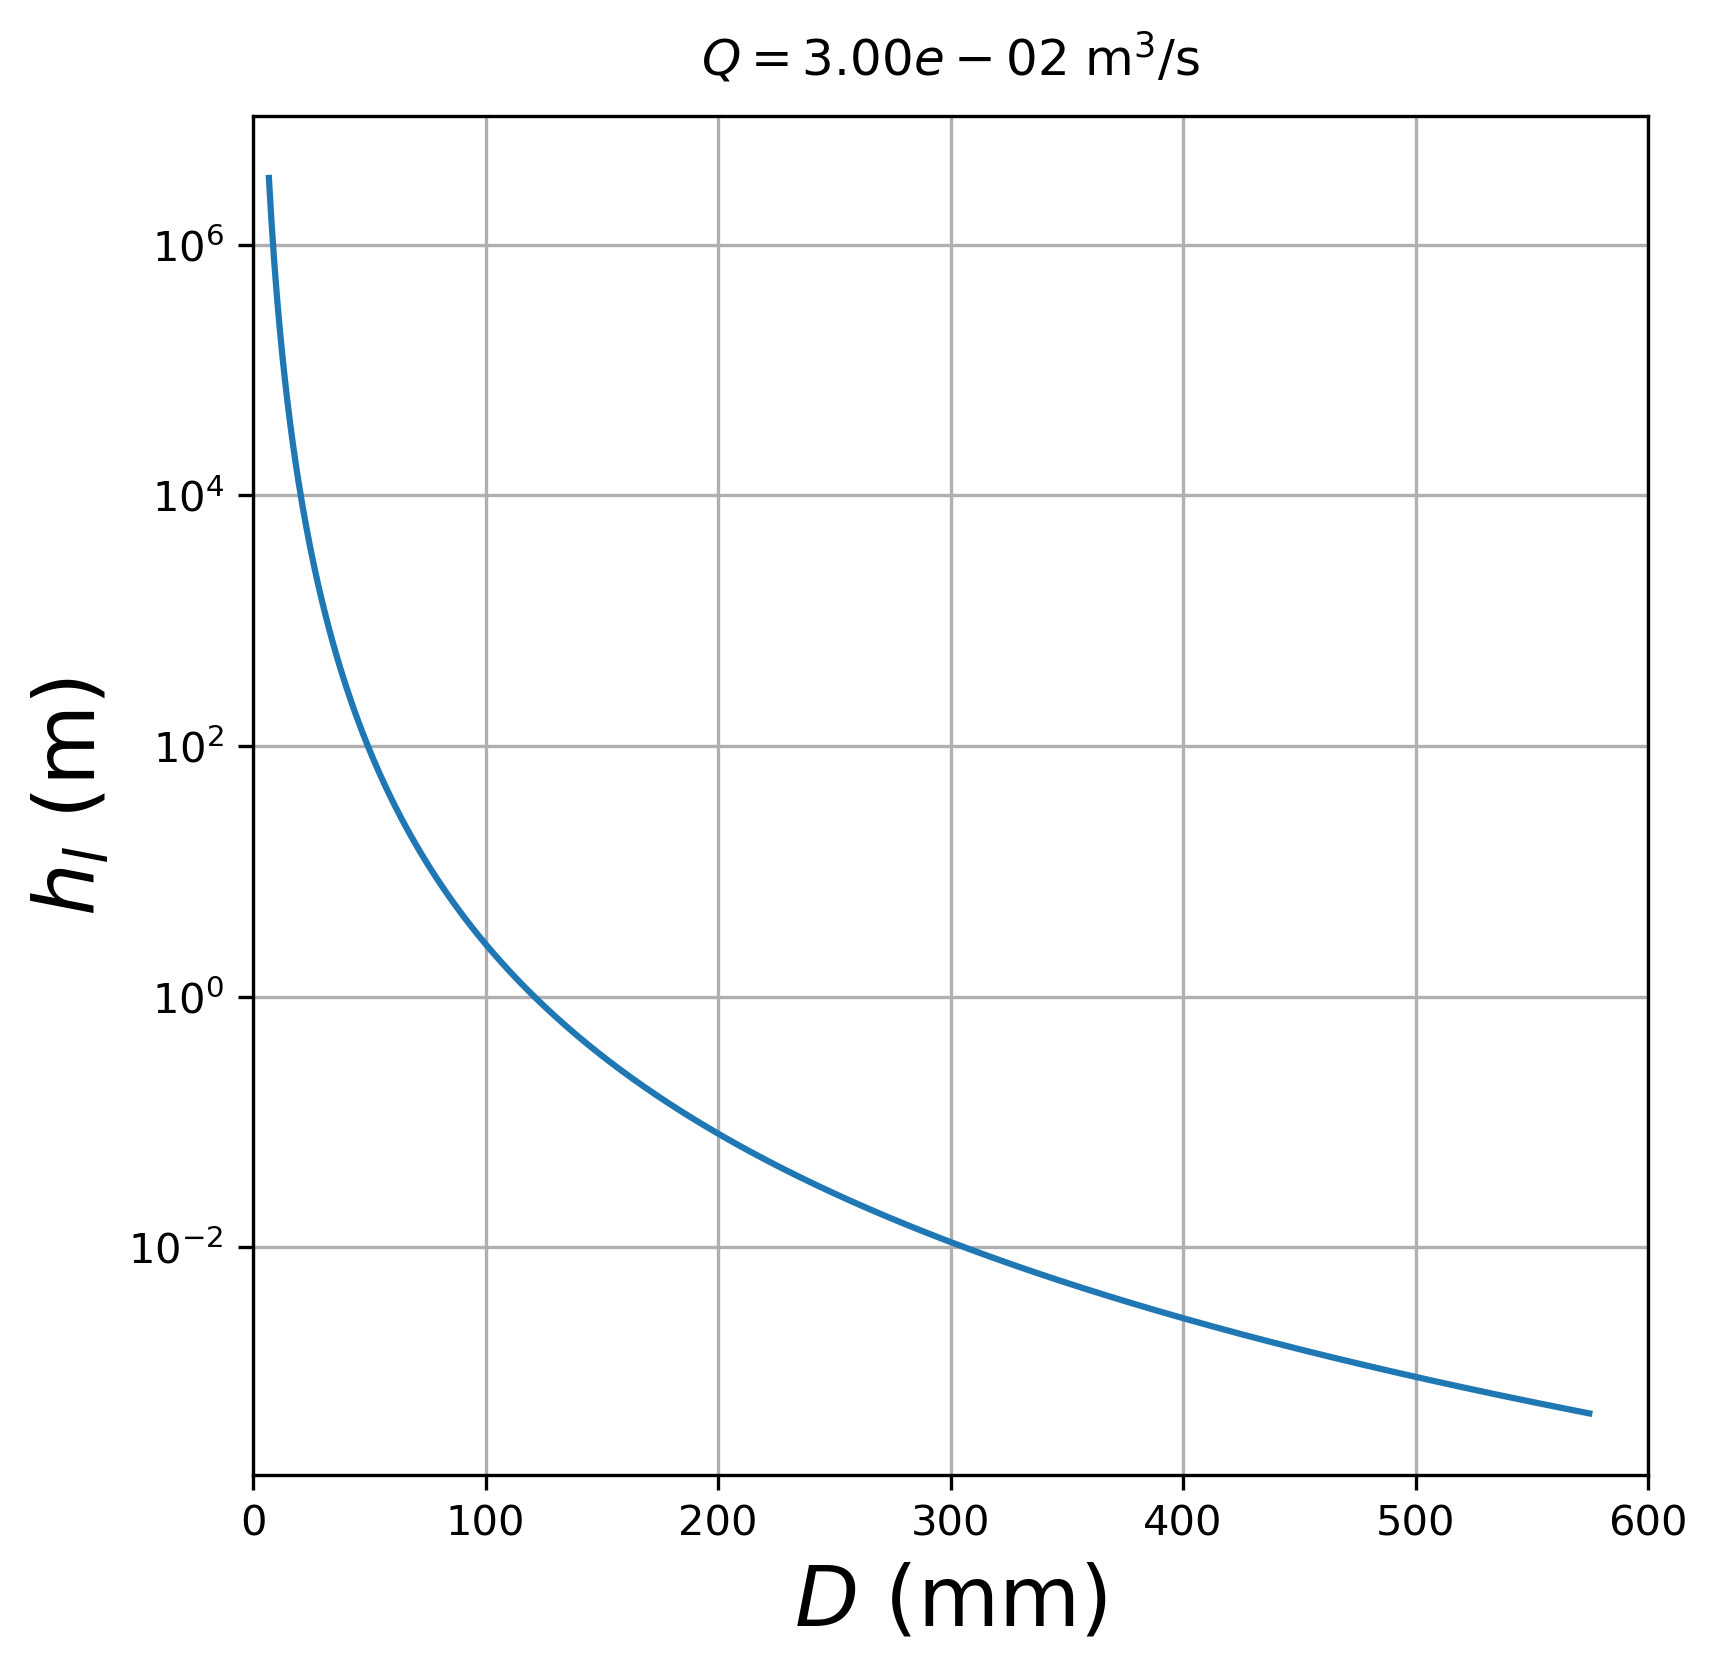

In [8]:
plt.close()
fig = plt.figure(figsize=(6,6),dpi=300)
ax=fig.add_subplot(111)
#ax.set_yscale('log')
ttl = plt.title('$Q=%.2e$ m$^3$/s'%Q,pad=10)
ax.plot(D*10**3,hl)
ax.set_xlabel('$D$ (mm)',fontsize=20)
ax.set_ylabel('$h_l$ (m)',fontsize=20)

# ax.xaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax.set_xlim(0,580)
ax.set_xticks(np.arange(0,700,100))
plt.yscale('log')
plt.grid('on',which='both')
plt.savefig('hl.png')

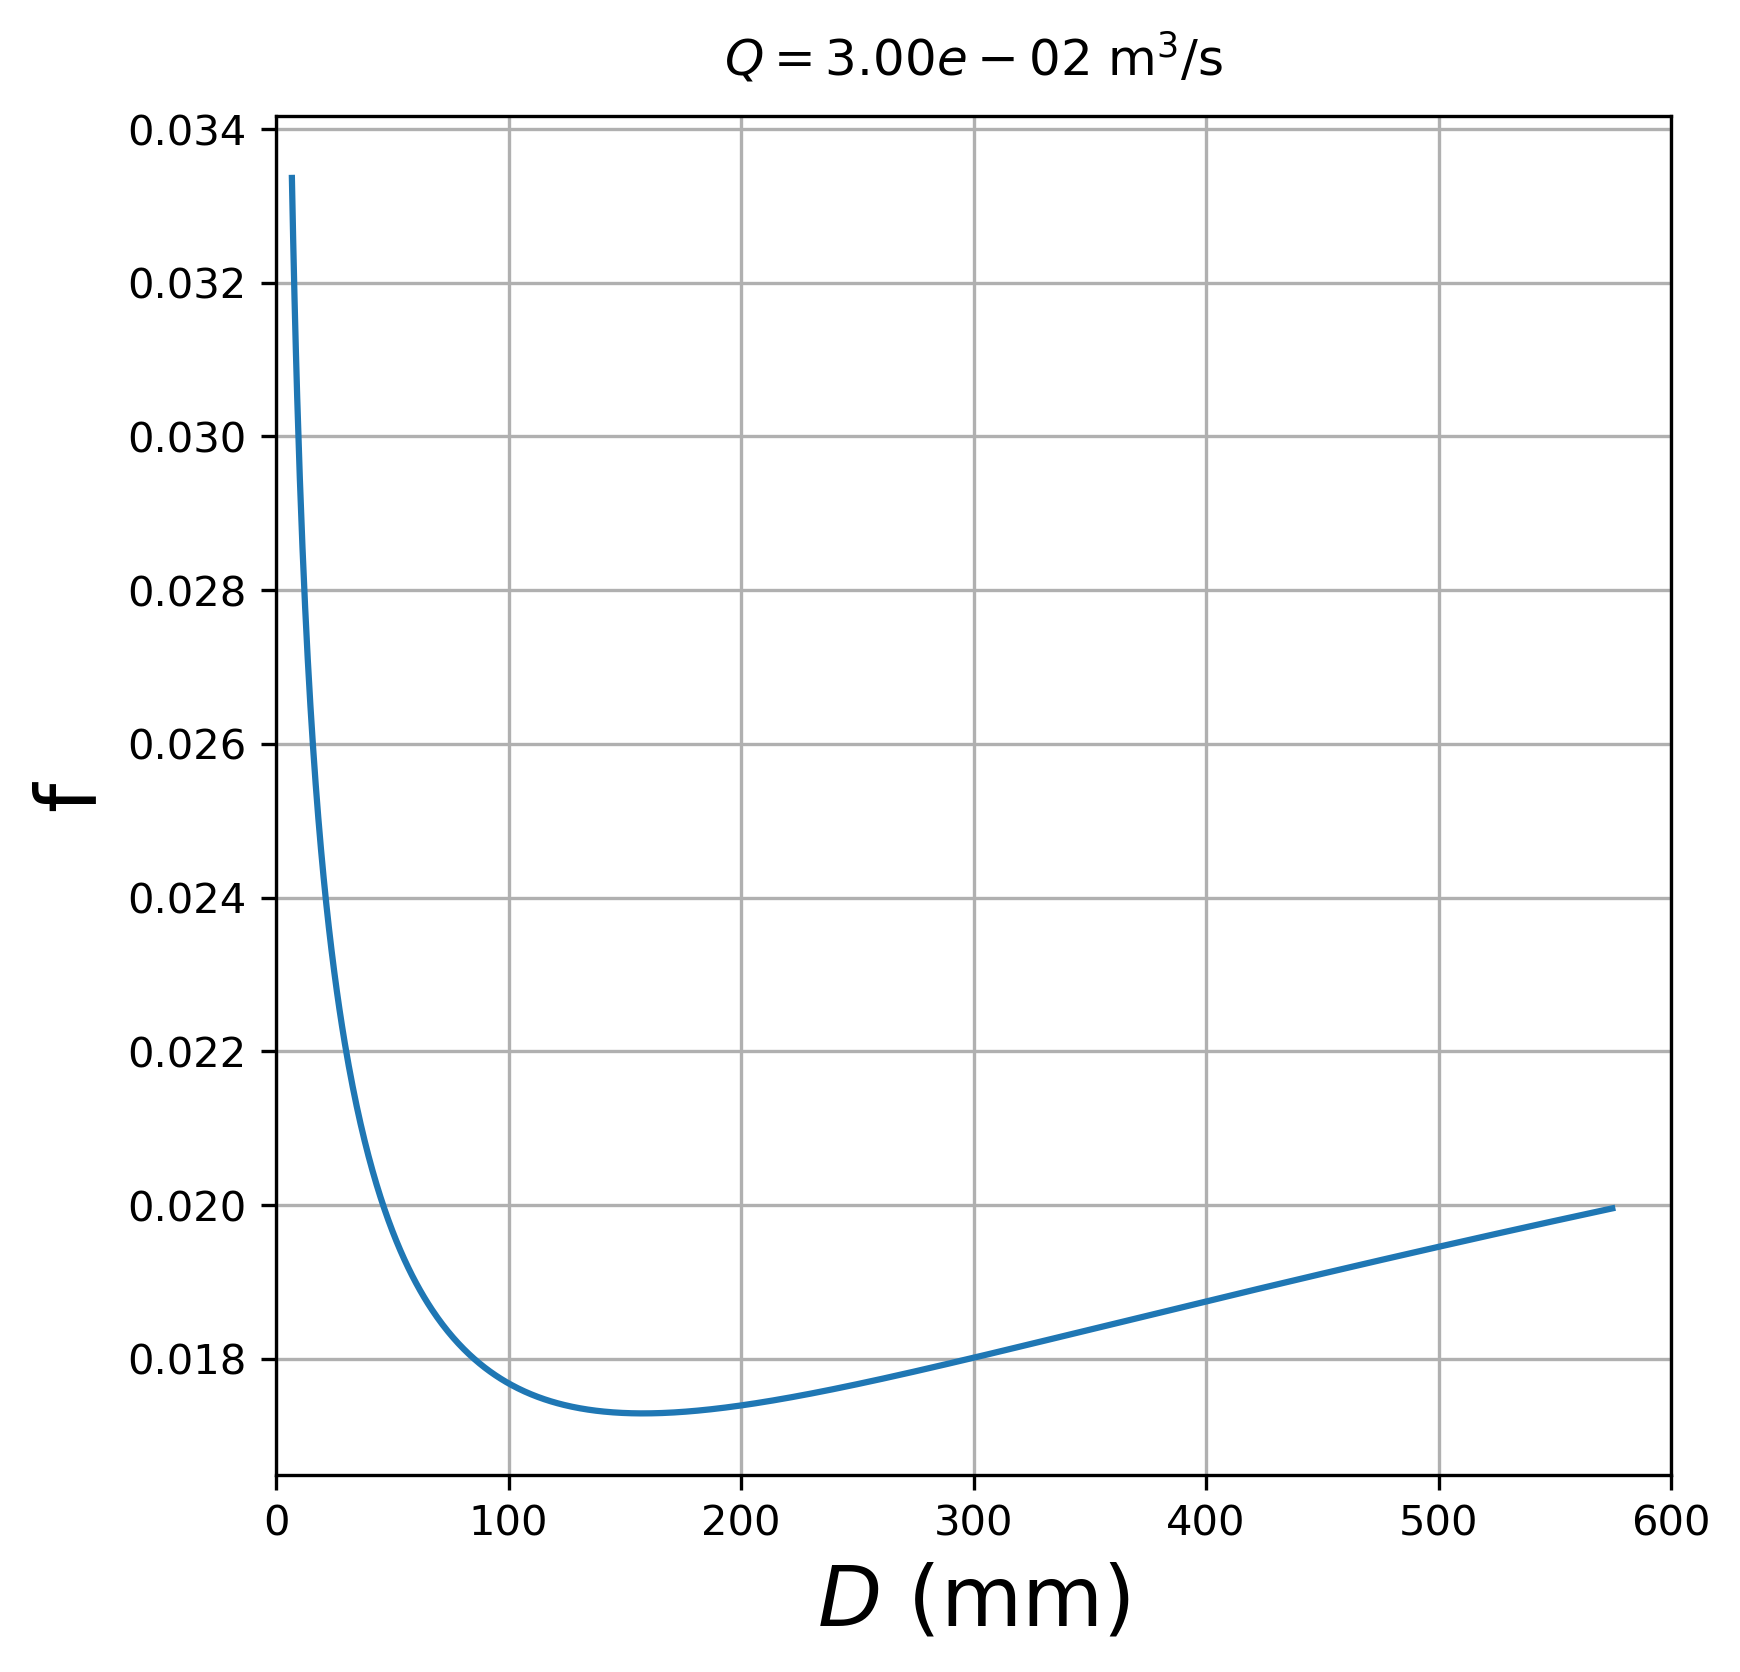

In [7]:
fig = plt.figure(figsize=(6,6),dpi=300)
ax=fig.add_subplot(111)
ttl = plt.title('$Q=%.2e$ m$^3$/s'%Q,pad=10)
ax.plot(D*10**3,f)
ax.set_xlabel('$D$ (mm)',fontsize=20)
ax.set_ylabel('f',fontsize=20)

# ax.xaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax.set_xlim(0,580)
ax.set_xticks(np.arange(0,700,100))
plt.grid('on',which='both')
plt.savefig('f.png')